<a href="https://colab.research.google.com/github/KingsleyElo/ml-zoomcamp-notes/blob/main/Linear%20regression/Linear_Regression_ML_ZOOMCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook contains my notes while learning Linear Regression as part of ML Zoomcamp…

## Data Preparation

In [1]:
data ='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [2]:
!wget $data

--2026-01-20 13:32:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.007s  

2026-01-20 13:32:01 (201 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
strings = list(df.dtypes [df.dtypes == 'object'].index)

In [8]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

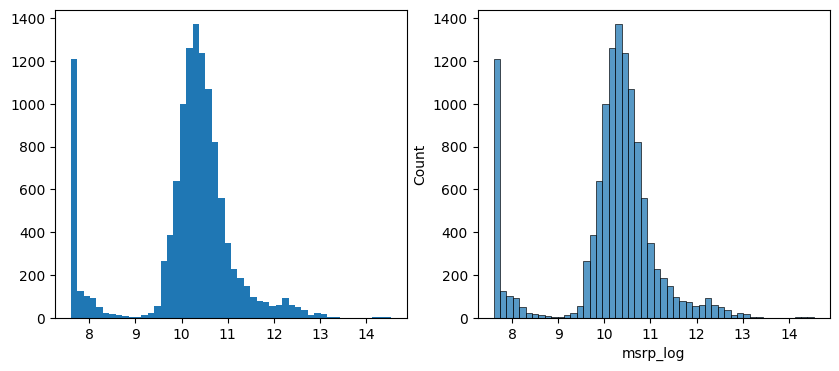

In [9]:
%matplotlib inline
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
# apply log transformation to a variable, after adding one to each input value.
df['msrp_log'] = np.log1p(df['msrp'])
ax1.hist(df['msrp_log'], bins = 50)
sns.histplot(df['msrp_log'], bins = 50, ax=ax2)
plt.show()

In [10]:
#check for null values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
msrp_log                0
dtype: int64

## Setting Up The Validation Framework

In [11]:
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = len(df) - n_val - n_test

In [12]:
print(n_train, n_val, n_test)

7150 2382 2382


In [13]:
# we need to randomise the selection
idx = np.arange(len(df))
np.random.seed(2)
np.random.shuffle(idx)

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
print(len(df_train), len(df_val), len(df_test))

7150 2382 2382


In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [18]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [19]:
len(df_train), len(y_train)

(7150, 7150)

## Linear Regression

### Simple Linear Regression Implementation

```
x = [453, 11, 86]
y = 1000
```

Here, `x` represents some car features:

- 453 → mpg
- 11 → another feature
- 86 → popularity

`y` is the price. Our goal is to create a model trained on `x` that predicts something close to `y`.

$$
g(x) \approx y
$$

where:  
- \(g\) represents the model  
- \(x\) represents the car  
- \(y\) represents the price

we would be using linear regression model, hence,

$$
g(x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3
$$

Here:

`w0` is the intercept (also called the bias term)

`w1`, `w2`, `w3` are the weights (slopes) for each feature in `x`

`x1`, `x2`, `x3` are the individual features of the car

> The equation can also be written as such

$$
g(x_i) \approx \sum_j w_j x_{ij} --- eqn (1)
$$

where:  

- $g(x_i)$ → the predicted value for the i-th sample  
- $\sum_j w_j x_{ij}$ → sum of all features multiplied by their corresponding weights (slopes)



In [20]:
#Implementing Equation 1 above in python

w0 = 7.17
w = [0.01 ,0.04, 0.002]

xi = [453, 11, 86]

def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred += w[j] * xi[j]

  return pred

In [21]:
round(float(np.expm1(linear_regression(xi))), 2)

222347.22

## Linear Regression Vector Form

To find the prediction for a single car or a single observation, we use;

$
g(x_i) \approx \sum_j w_j x_{ij} ---- eqn (1)
$

But there is a more compact way to write the function above;

$g(x_i) \approx w_o + x_i^{T}w ---- eqn(2)$

In [22]:
# implementing equation 2 above in python

def dot(xi, w):
  n = len(xi)

  res = 0.0

  for j in range(n):
    res += xi[j] * w[j]

  return res

def linear_regression2(xi):
  return round(w0 + dot(xi, w), 3)

$g(x_i) \approx w_o + x_i^{T}w ---- eqn(2)$

There is a shorter way to calculate the line of best fit.

```
Example:
x' = [1, x1, x2, x3]
w' = [w0, w1, w2, w3]

1 in x'[0] represnts the weight value for w0(bias term).
Doing this would have little effect since 1.w0 is w0
```

considering the example above, eqn (2) can be rewritten as

$g(x_i) \approx x_i'^{T}w' ---- eqn (3)$

In [23]:
# Implementing equation (3) in python

w_new = [w0] + w

def linear_regression3(xi):
  xi = [1] + xi
  return dot(xi, w_new)

linear_regression(xi)

12.312

Equation 1, 2 and 3 is good when we have a single observation. But in the case where we have a many observations in the feature vector, we can not compute one data point at a time, we compute predictions for all samples using the below;

$
\hat{y} = X w ---- (4)
$

---

## Feature Vector With Many Observations \(X\)

- Each **row** represents one observation (one car)  
- Each **column** represents one feature  

$
X =
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$

**Important points:**

- The first column is all 1s → represents the **intercept (bias)**  
- \(m\) = number of samples  
- \(n\) = number of features  

Hence, the matrix is of size $m \times (n+1)$.

---

### The Weight Vector(Slope and Intercept or bias term) \(w\)

On the right of \(X\) is the vector \(w\):

$
w =
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$

- $w_0 → intercept (bias) $
- $w_1, \dots, w_n → weights (slopes) for each feature $

---

### Matrix Multiplication: \(Xw\)

When we multiply:

$
Xw =
\begin{bmatrix}
x_1^T w \\
x_2^T w \\
\vdots \\
x_m^T w
\end{bmatrix}
$

Each row of the result is:

$
x_i^T w = w_0 + w_1 x_{i1} + w_2 x_{i2} + \dots + w_n x_{in}
$

So each row produces **one prediction**.

---

### The Prediction Vector (Predicted Price of the car) $\hat{y}$

The final result is the prediction vector:

$
\hat{y} =
\begin{bmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_m
\end{bmatrix}
$

Each element $\hat{y}_i$ is the predicted price for the \(i\)-th car.  

In [24]:
# Implementing equation (4) in python
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [25]:
# matrix vector multiplication using numpy's dot
def linear_regression4(X):
  return X.dot(w_new)

In [26]:
linear_regression4(X)

array([12.38 , 13.552, 12.312])

## Normal Equation (Linear Regression)
## solving for the slope and intercept

The normal equation gives the optimal regression parameters for linear regression:
$$
w = (X^{T} X)^{-1} X^{T} Y
$$

### Definitions
- **w**: Regression parameters (coefficients of the model) 

- **X**: Feature matrix (rows = samples, columns = features) 

- **Xᵀ**: Transpose of the feature matrix  

- **Y**: Target vector (values you want to predict)  

- **(XᵀX)⁻¹**: Inverse of the covariance matrix of features  

### Explanation
- Computes **w** that minimizes the Mean Squared Error (MSE) between predictions and true targets. 

- Provides a **closed-form solution**, no need for gradient descent.  

### Intuition
1. \(XᵀX\) captures relationships among features.  

2. \((XᵀX)⁻¹\) adjusts for correlations between features.  

3. \(XᵀY\) measures the relationship between each feature and the target.  

4. Multiplying these gives w, the best-fitting coefficients.  

### Notes
- Works well with a small number of features.  

- Computationally heavy for large datasets. 

- \(XᵀX\) must be invertible; otherwise, regularization is needed.

- **normal equation** is a shortcut that directly computes the paramters (slope and intercept) of the line that minimizes the sum of squared errors.

- **Gradient descent** walks to the bottom of the hill; the normal equation teleports you there (if the math allows it).



In [27]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [28]:
# Implementing the normal equation in python

X =[
       [148,   24, 1385],
       [132,   25, 2031],
       [453,   11,   86],
       [158,   24, 185],
       [172,   25, 201],
       [413,   11,   86],
       [38,    54, 185],
       [142,   25, 431],
       [453,   31,   86],
]

X = np. array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [29]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [30]:
train_linear_regression(X, y)

(np.float64(30006.77669255562),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

Let us train the car features using linear Regression

In [31]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp_log
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.575747
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,9.887663
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9.893235
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,7.601402
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757


In [32]:
# We are only going to train the numeric columns for the linear rehression
list_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[list_features]
X_train.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [33]:
# replace null values with 0 so that the model ignores those rows that don't have the features

X_train.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [34]:
#Fill the null values with 0
X_train = X_train.fillna(0)
X_train.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [35]:
X_train = X_train.values

In [36]:
# find the bias term and the coefficients

w0, w = train_linear_regression(X_train, y_train)

In [37]:
# train the model using the weights

y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

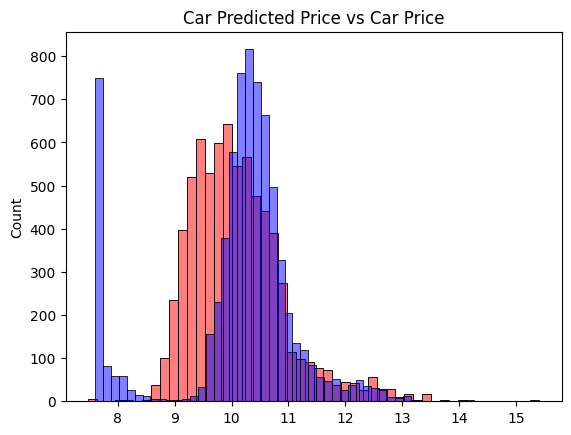

In [38]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)
plt.title('Car Predicted Price vs Car Price')
plt.show()

## Root Mean Square Error

In [39]:
def rmse(y_train, y_pred):
    se = (y_train - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [40]:
# Let us calculate the error
rmse(y_train, y_pred).round(5)

np.float64(0.75542)

## Validating The Model

Let us prepare the validation dataset the same way the training dataset was done

In [41]:
def prepare_dataset(df):
    df_prep = df[list_features]
    df_prep = df_prep.fillna(0)
    X = df_prep.values
    return X

In [42]:
# prepare the validation dataset using the prepare_dataset function
X_val = prepare_dataset(df_val)
len(X_val)

2382

In [43]:
len(df_val), len(y_val)

(2382, 2382)

In [44]:
# let us extract the bias term and the other coefficients
w0, w = train_linear_regression(X_val, y_val)

In [45]:
# let us train the linear regression model on the validation dataset

y_val_pred = w0 + X_val.dot(w)

# let us calculate the rmse

rmse(y_val, y_val_pred).round(5)

np.float64(0.751)

## Simple Feature Engineering

In [46]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = list_features + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [47]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

x_val = prepare_X(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058327)

Categorical Variables

In [48]:
# seperate the strings columns into a seperate list
column = df_train.columns
strings = []
for i in column:
    if df[i].dtypes == 'object':
        strings.append(i)
print(strings)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [49]:
# prepare the features column for the model training
def Prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = list_features + ['age']

    for i in [2, 3, 4]:
        (df['number_of_doors'] == i).astype(int)

    strings_dict = {}
    for i in strings:
        strings_dict[i] = list(df[i].value_counts().head().index)

    for col, values in strings_dict.items():
        for val in values:
            feature_name = f"{col}_{val}"
            df[feature_name] = (df[col] == val).astype(int)
            features = features + [feature_name]

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
X_train = Prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

x_val = Prepare_X(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

np.float64(100.63721342114685)

*This outcome (100.64) reflects multicollinearity in the feature set, resulting in unstable coefficients and reduced model reliability.*

## Normal Equation and the Singular Matrix Problem

For linear regression, the normal equation is:

$
\hat{w} = (X^T X)^{-1} X^T y
$

### Why does the singular matrix happen?

The matrix $ X^T X $ becomes **singular (non-invertible)** when:

- Columns of \( X \) are **linearly dependent** (duplicate or highly correlated features)
- The **number of features exceeds the number of samples**
- One column is a **linear combination** of other columns

Sometimes, adding a small value to a duplicate column appears to “fix” invertibility, but:

- It leads to **very large coefficients**
- The model becomes **numerically unstable**
- It results in **poor generalization**

This is **not a principled solution**.

---

## Regularization in the Normal Equation

When values are added to the diagonal of $ X^T X $, the equation becomes:

$
\hat{w} = (X^T X + \lambda I)^{-1} X^T y
$

This is known as **Ridge Regression**, or **L2 Regularization**.

By adding $ \lambda I $, the matrix becomes invertible and large coefficients are penalized, resulting in more stable and reliable estimates.


In [51]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    # add r to the diagonal of XTX
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    #find the inverse
    XTX_inv = np.linalg.inv(XTX)

    XTy = X.T.dot(y)
    w = XTX_inv.dot(XTy)
    return w[0], w[1:]

In [52]:
# train the regularized model on X and use the model to predict the validation set
X_train = Prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)

x_val = Prepare_X(df_val)
y_pred = w0 + x_val.dot(w)

# check how well our regularized model performed
rmse(y_val, y_pred)

np.float64(0.46992074687305513)

*Applying regularization to penalize large weights stabilized the model and resulted in better performance than the unregularized model, even prior to the inclusion of categorical variables.*

## Tuning the Model

In [53]:
for r in [0.0, 0.001, 0.0001, 0.00001, 1, 10, 100]:
    X_train = Prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    x_val = Prepare_X(df_val)
    y_pred = w0 + x_val.dot(w)
    print(f"r: {r}, bias term: {w0}, rmse: {rmse(y_val, y_pred)}")

r: 0.0, bias term: -2.548708193223995e+16, rmse: 152.173692379543
r: 0.001, bias term: 5.938669877126813, rmse: 0.46992074687305513
r: 0.0001, bias term: 5.974419370293617, rmse: 0.4699208515479028
r: 1e-05, bias term: 5.704357385635376, rmse: 0.4699208734005291
r: 1, bias term: 5.763065473001916, rmse: 0.4702345800539239
r: 10, bias term: 4.7962676361489684, rmse: 0.4858108836524049
r: 100, bias term: 2.7571287404909413, rmse: 0.6117243391284302


*From the results above, the model achieves its lowest RMSE when the regularization parameter 𝑟 = 0.001, making it the best-performing value among those tested.*

## Using The Model

In [54]:
df_full_train = pd.concat([df_train, df_val])
del df_full_train['msrp_log']

In [55]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [56]:
X_full_train = Prepare_X(df_full_train)
df_full_train = df_full_train.reset_index(drop=True)

In [57]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [58]:
y_full_train = np.concatenate([y_train, y_val])

In [59]:
del df_test['msrp_log']

In [60]:
# train the model on combine train and val datasets
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)

# test the model on the test dataset
X_test = Prepare_X(df_test)

y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score = round(float(score), 4)
score

0.4566

## Use the Model

In [61]:
# use the parameters to predict a car data from the test dataset
x_small = X_test[20]
y_pred = w0 + x_small.dot(w)
np.expm1(y_pred)

np.float64(35016.12177373648)

In [62]:
# the actual value
y = np.expm1(y_test[20])

print(f"predicted y: {round(np.expm1(y_pred), 2)}, actual y; {round(y, 2)}")

predicted y: 35016.12, actual y; 35000.0
